# Biodiversity Project

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?


Data sources:

Both Observations.csv and Species_info.csv was provided by Codecademy.com.

Note: The data for this project is inspired by real data, but is mostly fictional.

# Importing Modules

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# Importing and Scoping the Data

In [2]:
species = pd.read_csv('species_info.csv',encoding='utf-8')
species.head()
species.head(-5)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5814,Vascular Plant,Cuscuta suksdorfii,Mountain Dodder,NaN
5815,Vascular Plant,Datura wrightii,"Sacred Datura, Sacred Thornapple, Sacred Thorn...",NaN
5816,Vascular Plant,Nicotiana acuminata var. multiflora,Manyflower Tobacco,NaN
5817,Vascular Plant,Nicotiana attenuata,"Coyote Tabacco, Coyote Tobacco",NaN


In [4]:
observations = pd.read_csv('observations.csv', encoding='utf-8')
observations.head()
observations.head(-5)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23286,Symphyotrichum frondosum,Bryce National Park,101
23287,Sasa palmata,Yellowstone National Park,210
23288,Amaranthus hybridus,Great Smoky Mountains National Park,65
23289,Potentilla flabellifolia,Yellowstone National Park,246


In [5]:
print(f"species shape: {species.shape}")
print(f"observations shape: {observations.shape}")

species shape: (5824, 4)
observations shape: (23296, 3)


In [6]:
print(f"number of species:{species.scientific_name.nunique()}")

number of species:5541


In [7]:
print(f"nnumber of categories:{species.category.nunique()}")
print(f"categories:{species.category.unique()}")

nnumber of categories:7
categories:['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [8]:
species.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

There are a total of 5541 unique species which has been split into 7 categories. Vascular plant is the largest species (4470) with Reptile the smallest (79)

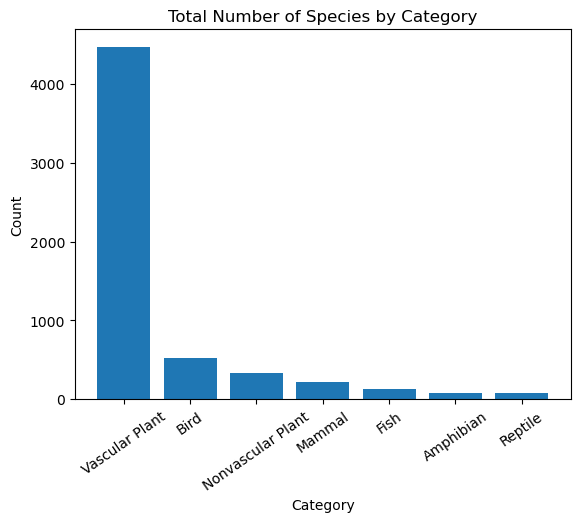

In [25]:
categories = species.groupby('category').size().sort_values(ascending=False).index
counts = species.groupby('category').size().sort_values(ascending=False).values

plt.bar(categories, counts)

plt.title('Total Number of Species by Category')
plt.xlabel('Category')
plt.ylabel('Count')

plt.xticks(rotation=35)

plt.show()


In [26]:
print(f"number of conservation statuses:{species.conservation_status.nunique()}")
print(f"unique conservation statuses:{species.conservation_status.unique()}")

number of conservation statuses:4
unique conservation statuses:[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [27]:
print(f"na values:{species.conservation_status.isna().sum()}")

print(species.groupby("conservation_status").size())

na values:5633
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


The column 'conservation_stauts' is of particular importance for our research question. I can see that there are four unique categories with 5633 NaN values. 

In this instance, the NaN values are not a concern as this represents that the species has no conservation status and are not at risk. I will convert these values into a usable format

In [32]:
species.fillna('No Intervention', inplace=True)
species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

The next stage is to explore the observations data set

In [28]:
print(f"number of parks:{observations.park_name.nunique()}")
print(f"unique parks:{observations.park_name.unique()}")

number of parks:4
unique parks:['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [31]:
print(f"number of observations:{observations.observations.sum()}")

number of observations:3314739


The species data has been collected across four parks with a total number of 3314739 observations. 

I am happy with the current state of the data and can begin my analysis now. 

# Q1: What is the distribution of conservation status for species?

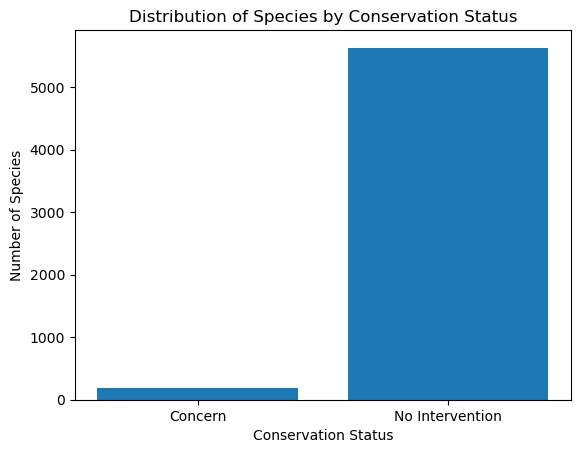

In [72]:
concern = species[species['conservation_status'].isin(['Endangered', 'In Recovery', 'Species of Concern', 'Threatened'])]

concern_counts = concern.groupby('conservation_status').size().reset_index(name='count')
no_intervention_count = species[species['conservation_status'] == 'No Intervention'].shape[0]

counts = [concern_counts['count'].sum(), no_intervention_count]

labels = ['Concern', 'No Intervention']

plt.bar(labels, counts)

plt.title('Distribution of Species by Conservation Status')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')

plt.show()


In [42]:
print(concern_counts.sum())

conservation_status    EndangeredIn RecoverySpecies of ConcernThreatened
count                                                                191
dtype: object


The distribution of conservation status for species is 5633 in the no intervention group and 191 in the intervention group. 

# Q2: Are certain types of species more likely to be endangered?

The first stage is to explore all of the species that are in the intervention group. I will first view this in a table and then visualise this data in a stacked chart 

In [43]:
conservationCategory = species[species.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


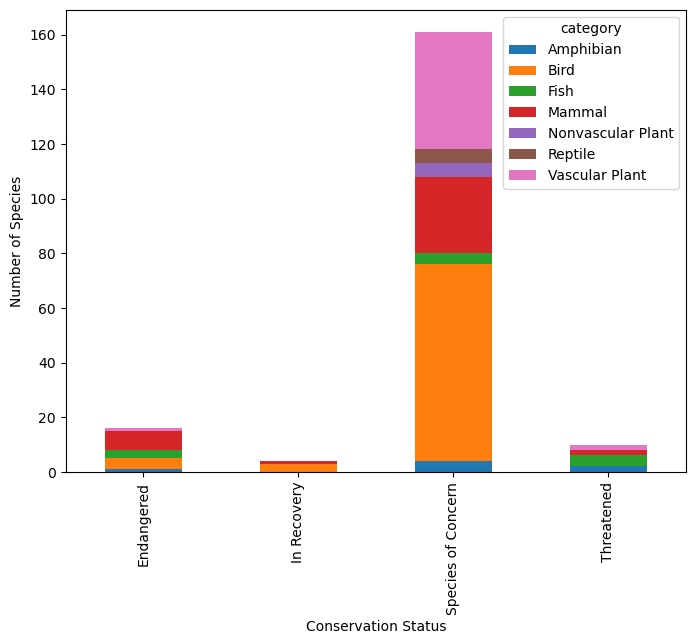

In [44]:
ax = conservationCategory.plot(kind = 'bar', figsize=(8,6), 
                               stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");

For those in the Endangered status, 7 were mammals and 4 were birds. In the In Recovery status, there were 3 birds and 1 mammal, which could point towards the intervention being more successful for birds. Although, we cannot draw this conclusion at this stage

In [51]:
species['is_protected'] = species.conservation_status != 'No Intervention'

category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Converting the above absolute numbers into percentages to gain an understanding of the distribution amongst species.

In [52]:
category_counts['percent_protected'] = category_counts.protected / \
                                      (category_counts.protected + category_counts.not_protected) * 100

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


Mammals (17%) and Birds (15%) are the most endangered species in the parks with both species of plant, Vascular Plant and Nonvascular Plant, the least endangered (1% and 1.5% respectively) 

# Q3: Are the differences between species and their conservation status significant?

I will now run a chi-squared test to investigate whether thre is statistical significance between the conservation status of Mammal and Bird

In [53]:
from scipy.stats import chi2_contingency

contingency1 = [[30, 146],
              [75, 413]]
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

The p-value of 0.69 is above the 0.05 threshold for significance and so I can determine that mammals are not significantly more endangered than birds

I will now run a series of tests to check for statistical significance amongst species:

Amphibian and Mammals:

In [59]:
contingency1 = [[7, 72],
              [30, 146]]
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=2.321746712946015, pvalue=0.12757669693198975, dof=1, expected_freq=array([[ 11.4627451,  67.5372549],
       [ 25.5372549, 150.4627451]]))

Fish and Mammals:

In [60]:
contingency1 = [[11, 115],
              [30, 146]]
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=3.6476510249814145, pvalue=0.056148348448900355, dof=1, expected_freq=array([[ 17.10596026, 108.89403974],
       [ 23.89403974, 152.10596026]]))

Reptiles and Mammals:

In [62]:
contingency1 = [[5, 73],
              [30, 146]]
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 10.7480315,  67.2519685],
       [ 24.2519685, 151.7480315]]))

Reptiles and Birds:

In [67]:
contingency1 = [[5, 73],
              [75, 413]]
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=3.739654778685496, pvalue=0.053135422321542065, dof=1, expected_freq=array([[ 11.02473498,  66.97526502],
       [ 68.97526502, 419.02473498]]))

Nonvascular Plants and Birds:

In [71]:
contingency1 = [[5, 328],
              [75, 413]]
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=41.71745786999272, pvalue=1.0546306904974968e-10, dof=1, expected_freq=array([[ 32.44823386, 300.55176614],
       [ 47.55176614, 440.44823386]]))

The results of the chi-squared test suggest that Mammal is at a significantly greater risk when compared to Reptile, Nonvascular and Vascular Plant.

Bird is at a significantly greater risk when compared to Nonvascular and Vascular Plant.

There is no significant difference between the two most endangered species Mammal and Bird. 

# Q4: Which animal is most prevalent and what is their distribution amongst parks?

Firstly, I will look at the most occuring names from species to understand the most common animals in the dataset. 

In [78]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species[species.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_Names[:10]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer'],
 ['Feral', 'Hog', 'Wild', 'Pig'],
 ['Coyote'],
 ['Gray', 'Wolf'],
 ['Red', 'Wolf']]

I will now clean this output to remove dupicates across parks 

In [77]:
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
    
cleanRows[:10]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer'],
 ['Feral', 'Hog', 'Wild', 'Pig'],
 ['Coyote'],
 ['Gray', 'Wolf'],
 ['Red', 'Wolf']]

These species will then be put into a list for easier analysis

In [79]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res[:10]

['Gappers',
 'RedBacked',
 'Vole',
 'American',
 'Bison',
 'Aurochs',
 'Domestic',
 'Cattle',
 'Feral',
 'Domesticated']

In [81]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

,Word,Count
59,Bat,23
68,Shrew,18
174,Myotis,17
171,Mouse,16
5,Chipmunk,13
73,Squirrel,12
201,American,12
194,Eastern,11
147,Vole,11
55,Mountain,10


From this, I can see that Bat is the most common animal across the species data set. I will filter this further by investigating the scientific names of the animals and saving it to the df is_bat

In [82]:
species['is_bat'] = species.common_names.str.contains(r"\bBat\b", regex = True)

species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


In [84]:
species[species.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


The next stage is to merge the bat species with the observations data set

In [86]:
bat_observations = observations.merge(species[species.is_bat])
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


We can now start to look at bat observations across each of the four parks and split them into conservation status

In [87]:
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


In [89]:
obs_by_park = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


This data appears to show that there are more bats without a protection status than those that are protected in three of the four national parks (excluding Bryce National Park). I will create a side-by-side bar chart to better visualise this data:

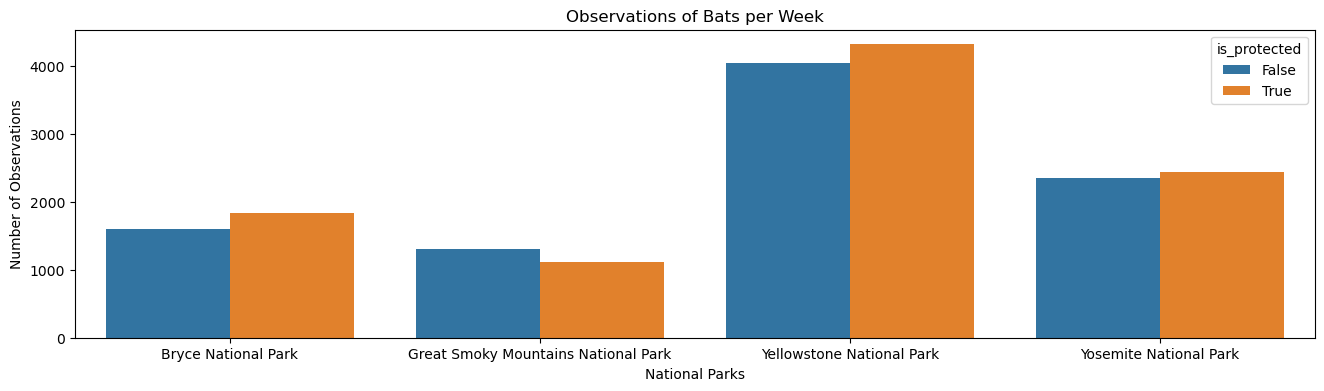

In [91]:
plt.figure(figsize=(16, 4))
sns.barplot(x=obs_by_park.park_name, y= obs_by_park.observations, hue=obs_by_park.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.show()

# Summary

- What is the distribution of conservation status for species?
    - 5633 species are under no protection status and 191 species are under a protection status across the four national parks. 
- Are certain types of species more likely to be endangered?
    - Mammal (17%) and Bird (15%) are the most likely species to be endangered. 
- Are the differences between species and their conservation status significant?
    - Mammal is at a significantly greater risk when compared to Reptile, Nonvascular and Vascular Plant.
    - Bird is at a significantly greater risk when compared to Nonvascular and Vascular Plant.
    - There is no significant difference between the two most endangered species Mammal and Bird.
- Which animal is most prevalent and what is their distribution amongst parks?
    - Bats are the most prevalent animals and can be most often found at Yellowstone National Park (8362). The bat occurences in the other parks were Yosemite National Park (4786), Bryce National Park (3433), and Great Smoky Mountains National Park (2411).
    - There are more bats without a protection status than those that are protected in three of the four national parks (excluding Bryce National Park)